## 10. テキストの分類分析
### 10.1 分類分析
機械学習は**教師あり学習**、**教師なし学習**、**強化学習**、**半教師あり学習**等に細分化できる。  
ここでは、教師あり学習方法によりテキストを何らかの特徴別に分類するルールなどを作成し、  
そのルール等に基づいて所属が不明であるテキストを分類する方法及びその例を示す。  
テキストのカテゴリが基地であるデータを用いて、カテゴリ別に分類するモデルを作成し、  
カテゴリが未知であるテキストを各カテゴリに振り分ける。  
テキストの分類の目的の1つは、電子化されたテキストを機械的に分類することである。

### 10.2 分類結果の評価
#### 交差検証法
精度の評価には、学習データを用いてモデルを作成し、学習に用いてないテストデータを用いてモデルを評価するのが一般的である。  
**交差検証法**は、データ標本を$k$等分に分割し、うち$k-1$個を学習用とし、1個をテスト用として$k$回の学習とテストを行う。  
この方法を**k分割交差検証法**とも呼ぶ。$k$が標本サイズと等しいときには、1個抜き交差検証法**LOOCV**に相当する。  
データセットの中からランダムに一部をテスト用として取り除いて、残りを学習用とする方法もある。   
取り除いたデータを**OOBデータ**と呼び、学習の結果についてテストに使用する。  
#### 混同行列
群(カテゴリ)$A_i$における分類の結果は、次の表のような形式で示すことができる。  


||予測|Yes(P)|No(N)|
|-|-|-|-|
|実測|Yes(P)|$a_i$またはTP|$b_i$またはFN|
||No(N)|$c_i$またはFP|$d_i$またはTN|

TPは真陽性、FPは偽陽性、TNは真陰性、FNは偽陰性の略である。  
#### 正解率・再現率・適合率・$F_1$値
混同行列における主対角線の値の合計が全体の数に占める割合を**正解率**と呼ぶ。  
$$
正解率=\frac{a_i+d_i}{a_i+b_i+c_i+d_i}=\frac{TP+TN}{TP+FN+FP+TN}
$$
また、「1-正解率」を**誤分類率**と呼び、広く用いられている。  
他にも**再現率**や**適合率**を用いる場合もある。  
再現率は分類器がどれくらい漏れなく正しく判別しているかに関する度合であり、  
適合率は分類器の結果に混入したごみを考慮した的中率である。
$$
再現率:R_i=\frac{a_i}{a_i+b_i},\ TPR=\frac{TP}{TP+FN}\\
適合率:P_i=\frac{a_i}{a_i+c_i},\ PPV=\frac{TP}{TP+FP}
$$
再現率は感度または真陽性率、適合率は陽性的中率とも呼ぶ。  
多群$A_1,A_2,\cdots,A_m$の分類の問題では、評価指標として再現率と適合率の**マクロ平均**
$$
再現率:R=\frac{1}{m}\sum_{i=1}^m\frac{a_i}{a_i+b_i},\ 適合率:P=\frac{1}{m}\sum_{i=1}^m\frac{a_i}{a_i+c_i}
$$
あるいは**マイクロ平均**
$$
再現率:R=\frac{\sum_{i=1}^ma_i}{\sum_{i=1}^m(a_i+b_i)},\ 適合率:P=\frac{\sum_{i=1}^ma_i}{\sum_{i=1}^m(a_i+c_i)}
$$
が用いられている。  
再現率と適合率を折衷した評価指数として**$F_{\beta}$値**がある、通常$\beta=1$である**$F_1$値**が多用されている。  
$$
F_{\beta}=\frac{(\beta^2+1)×P×R}{\beta^2×P+R},\ F_1=\frac{2×P×R}{P+R}
$$

#### ROCとAUCのグラフ
再現率(感度)は、群Aについて分類器がどれくらい漏れなく分類できているかに関する指標である。  
これに対し、群AでないものをAでないものとして正しく分類しているかに関する指標として特異度(真陰性率)がある。
$$
特異度:Specificity=\frac{d}{c+d}=\frac{TN}{FP+TN}
$$
感度を縦軸とし、群A以外を正しく分類できていない度合、つまりAでないものがAであると判別された度合「1-特異度」(偽陰性率)を  
横軸にした曲線を受信者操作特性**ROC曲線**と呼ぶ。  
また、その曲線の下側の面積を**AUC面積**と呼ぶ。AUCの値が大きいほど両分布がかけ離れていることを表す。  
#### Kappa係数
混同行列の主対角線の値とその期待値を用いて次の式で計算された値をCohenの**Kappa係数**と呼ぶ。  
$CM$は混同行列、$CM_{i+}$は混同行列の第$i$行の合計、$CM_{+i}$は混同行列の第$i$列の合計、$N$は混同行列の総合計を表す。
$$
Kappa=\frac{P_o-P_e}{1-P_e}\\
P_o=\biggl(\sum_{i}^K\sum_{i}^KCM_{ii} \biggr)/N,\ P_e=\biggl(\sum_{i}^K\sum_{i}^KCM_{i+}CM_{+i}/N \biggr)/N
$$
この値が大きいほど分類性能が良いと判断する。

### 10.3 いくつかの分類器
#### k近傍法と実践
##### k近傍法
**k近傍法(k-NN)**では、分類したい対象に最も近い個体をk個見つけ、多数決により分類対象が属するグループを判断する。  
距離は一般的にユークリッド距離が用いられている。  
k近傍法ではkの値が結果を左右することもあり、いくつにすべきかが問題となる。  
一般的に、学習データを用いて可能性があるkをいろいろ変えて逐次にテストを行い、成績の良いものを選ぶ。  
この作業を、機械学習の分野では、**チューニング**と呼ぶ。  
##### スパムメールの例
スパムまたはノンスパムの4601通の電子メールから集計したデータを使用する。  
1～48列は、電子メールに用いられた単語と数値の相対頻度である。  
変数49～54は、記号","、"()"などの相対頻度である。  
変数55～57は、メールにおける大文字からなる文字列の平均、最長、合計の長さである。  
58番目の変数は、各行がスパムであるかノンスパムであるかを文字列で記録しているものである。  
変数1～54は相対頻度であるが、55～57は平均値とカウントした度数であり、単位が異なる。  
単位に影響されないように事前処理が必要となる。

In [1]:
import pandas as pd

d1 = pd.read_csv('study/参考書/テキストアナリティクス/spam.csv', encoding='shift-jis')
d1

,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,spam
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,spam
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,spam
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,spam
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,nonspam
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,nonspam
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,nonspam
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,nonspam


各列の平均値と標準偏差でデータの標準化を行い、$k=3$として分類を行う。

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

train_data, test_data = train_test_split(d1, test_size=0.1, stratify=d1.type)
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

sc = StandardScaler().fit(train_data.iloc[:,:-1])
train_data_scaled = sc.transform(train_data.iloc[:,:-1])
train_data_scaled = pd.DataFrame(train_data_scaled, columns=d1.columns[:-1])
train_data_scaled['type'] = train_data["type"]

test_data_scaled = sc.transform(test_data.iloc[:,:-1])
test_data_scaled = pd.DataFrame(test_data_scaled, columns=d1.columns[:-1])
test_data_scaled['type'] = test_data["type"]

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(train_data_scaled.iloc[:,:-1], train_data_scaled.iloc[:,-1])

KNeighborsClassifier(n_neighbors=3)

In [3]:
pred = knn.predict(test_data_scaled.iloc[:,:-1])
print("confusion matrix")
print(confusion_matrix(test_data_scaled.iloc[:,-1], pred))
print("accuracy: ", accuracy_score(test_data_scaled.iloc[:,-1], pred))
print("precision: ", precision_score(test_data_scaled.iloc[:,-1], pred, pos_label = 'spam'))
print("recall: ", recall_score(test_data_scaled.iloc[:,-1], pred, pos_label = 'spam'))
print("F1: ", f1_score(test_data_scaled.iloc[:,-1], pred, pos_label = 'spam'))

confusion matrix
[[257  22]
 [ 28 154]]
accuracy:  0.8915401301518439
precision:  0.875
recall:  0.8461538461538461
F1:  0.8603351955307262


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import numpy as np

pipe = Pipeline(steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier())])

param_grid = {
    "knn__n_neighbors": np.arange(1,11)
}

search = GridSearchCV(pipe, param_grid, scoring="accuracy", cv=10, n_jobs=-1)
search.fit(train_data.iloc[:,:-1], train_data.iloc[:,-1])

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='accuracy')

In [5]:
search.best_params_

{'knn__n_neighbors': 1}

In [6]:
pred = search.best_estimator_.predict(test_data.iloc[:,:-1])
print("confusion matrix")
print(confusion_matrix(test_data.iloc[:,-1], pred))
print("accuracy: ", accuracy_score(test_data.iloc[:,-1], pred))
print("precision: ", precision_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))
print("recall: ", recall_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))
print("F1: ", f1_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))

confusion matrix
[[256  23]
 [ 22 160]]
accuracy:  0.9023861171366594
precision:  0.8743169398907104
recall:  0.8791208791208791
F1:  0.8767123287671232


#### 線形判別分析
図に示す2群判別を考える。  
各群の楕円の大きさを群内の分散$\boldsymbol{W}$とみなし、2つの群をちょうど取り囲む破線の楕円を全体の分散$\boldsymbol{T}$とする。

In [7]:
import scipy.stats as stats

x = y = np.arange(-20, 20, 0.5)
X, Y = np.meshgrid(x, y)
 
def make_circle(cx,cy,rx, ry):
    t = np.arange(0, 2*np.pi, 0.01)
    x = cx + rx * np.cos(t)
    y = cy + ry * np.sin(t)
    return (x, y)

Z1 = make_circle(0,2,4,3)
Z2 = make_circle(0,-2,4,3)
Z3 = make_circle(0,0,5,5)

Z4 = make_circle(0,0.5,4,3)
Z5 = make_circle(0,-0.5,4,3)
Z6 = make_circle(0,0,4.5,3.5)

(-5.5, 5.5)

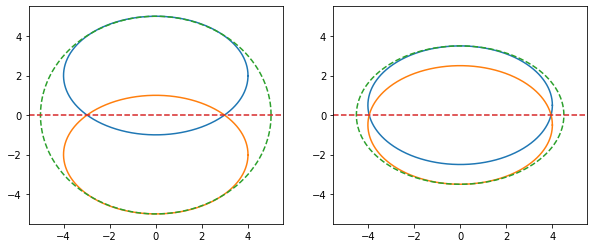

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1 ,2, figsize=(10,4))

axes[0].plot(Z1[0], Z1[1])
axes[0].plot(Z2[0], Z2[1])
axes[0].plot(Z3[0], Z3[1], '--')
axes[0].plot(np.array([-5.5,5.5]), np.array([0,0]), '--')
axes[0].set_xlim([-5.5, 5.5])
axes[0].set_ylim([-5.5, 5.5])

axes[1].plot(Z4[0], Z4[1])
axes[1].plot(Z5[0], Z5[1])
axes[1].plot(Z6[0], Z6[1], '--')
axes[1].plot(np.array([-5.5,5.5]), np.array([0,0]), '--')
axes[1].set_xlim([-5.5, 5.5])
axes[1].set_ylim([-5.5, 5.5])

左側の図では両群を引き分ける直線を簡単に引けるが、右側ではできない。  
つまり、群間の分散が大きく、かつ群内の分散が小さい方が分類しやすいことが分かる。  
全体の分散と群内の分散の比が大きい方が分類しやすいということである。  
全体の分散は、群間の分散と群内の分散の合計である。
$$
全体の分散(\boldsymbol{T})=群間の分散(\boldsymbol{B})+群内の分散(\boldsymbol{W})
$$
線形判別分析では群間の分散と群内の分散の比を最大化する方法によりもっともよく引け分ける直線の関数を求める。
$$
\arg\max\{群間の分散(\boldsymbol{B})/群内の分散(\boldsymbol{W})\}
$$
その解は$\boldsymbol{W}^{-1}\boldsymbol{B}$の固有値分解の方法で求めることができる。  
学習データの集合$(\boldsymbol{x}_1,y_1),(\boldsymbol{x}_2,y_2),\cdots,(\boldsymbol{x}_n,y_n)$があるとする。  
$\boldsymbol{x}_i=(x_{i1},x_{i2},\cdots,x_{ij},\cdots,x_{ip})$は、テキスト$i$から集計した項目である。この中の位置の項目を**独立変数**と呼ぶ。  
$\boldsymbol{y}=(y_1,y_2,\cdots,y_i,\cdots,y_n)$は、それぞれのテキストが属する群のラベルであり、**目的変数**と呼ぶ。  
線形判別においては、次に示す**判別関数**を用いる。式の中の$\boldsymbol{\beta}$は固有ベクトルである。  
2群判別においては、一般的にゼロを閾値とする。
$$
\hat{y}_i=\boldsymbol{\beta}\boldsymbol{x}_i^T=\beta_1x_1+\beta_2x_2+\cdots+\beta_px_p
$$


In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(train_data.iloc[:,:-1], train_data.iloc[:,-1])

LinearDiscriminantAnalysis(n_components=1)

In [10]:
pred = lda.predict(test_data.iloc[:,:-1])
print("confusion matrix")
print(confusion_matrix(test_data.iloc[:,-1], pred))
print("accuracy: ", accuracy_score(test_data.iloc[:,-1], pred))
print("precision: ", precision_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))
print("recall: ", recall_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))
print("F1: ", f1_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))

confusion matrix
[[262  17]
 [ 36 146]]
accuracy:  0.8850325379609545
precision:  0.8957055214723927
recall:  0.8021978021978022
F1:  0.846376811594203


線形判別の利点は、判別関数の中の係数の大きさを用いてどの変数が判別に寄与しているかを考察できることである。

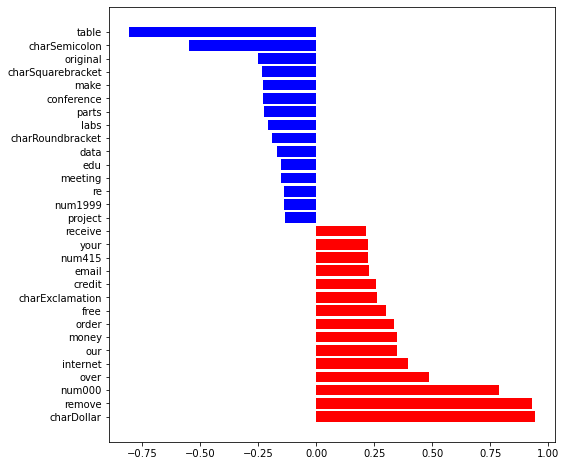

In [11]:
coef = pd.DataFrame({"col":test_data.columns[:-1],
                     "coef":lda.scalings_.ravel()})
coef = coef.sort_values(['coef'], ascending=False)
coef2 = pd.concat([coef.iloc[:15,:], coef.iloc[-15:,:]])

colors = ['red']*15+['blue']*15

plt.figure(figsize=(8,8))

plt.barh(y=coef2['col'], width=coef2['coef'], color=colors);

#### ロジスティック判別法
ある事象が起こる確率を$p$、怒らない確率を$q=1-p$とした二項分布に従うデータのモデリングには、  
起こる確率と起こらない確率の対数オッズの線形モデルが多用されている。
$$
\log\frac{p}{1-p}=\beta_0+\boldsymbol{\beta}\boldsymbol{x}^T
$$
この式の左辺をロジット関数と呼び、その逆関数をロジスティック関数と呼ぶ。
$$
p=\frac{\exp(\beta_0+\boldsymbol{\beta}\boldsymbol{x}^T)}{1+\exp(\beta_0+\boldsymbol{\beta}\boldsymbol{x}^T)}
$$
ロジスティック関数を用いたモデルに基づいた判別分析を**ロジスティック判別分析**と呼ぶ。  
係数$\boldsymbol{\beta}$の推定値は上記の式の対数尤度関数$l(\boldsymbol{\beta})$を最大化する方法、  
あるいは重み付きの最小二乗法を用いて次の推定式によって求められる。  
式の中の$\boldsymbol{W}$は重みを対角要素とした対角行列である。
$$
\hat{\boldsymbol{\beta}}=(X^T\boldsymbol{W}X)^{-1}X^T\boldsymbol{W}Y
$$
求めた$p$の値が0より大きいか、小さいかでどの群に属するかを判別する。  
3群以上のケースに拡張したロジスティック判別分析を**多項ロジスティック判別分析**、または**多項ロジットモデル**と呼ぶ。  
$K(k=1,2,\cdots,K)$個の群の選択肢があり、選択結果を$y_{ik}$で表示すると、第$k$番目の群のロジットモデルは次のように表すことができる。
$$
p(C_1|\boldsymbol{x})=\frac{1}{1+\sum_{c=2}^K\exp(\beta_0^c+\boldsymbol{\beta}^c\boldsymbol{x}^T)},\ k=1\\
p(C_k|\boldsymbol{x})=\frac{\exp(\beta_0^k+\boldsymbol{\beta}^k\boldsymbol{x}^T)}{1+\sum_{c=2}^K\exp(\beta_0^c+\boldsymbol{\beta}^c\boldsymbol{x}^T)},\ k=2,3,\cdots,K
$$

In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', solver='liblinear')
lr.fit(train_data.iloc[:,:-1], train_data.iloc[:,-1])

LogisticRegression(penalty='l1', solver='liblinear')

In [44]:
pred = lr.predict(test_data.iloc[:,:-1])
print("confusion matrix")
print(confusion_matrix(test_data.iloc[:,-1], pred))
print("accuracy: ", accuracy_score(test_data.iloc[:,-1], pred))
print("precision: ", precision_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))
print("recall: ", recall_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))
print("F1: ", f1_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))

confusion matrix
[[261  18]
 [ 20 162]]
accuracy:  0.9175704989154013
precision:  0.9
recall:  0.8901098901098901
F1:  0.8950276243093923


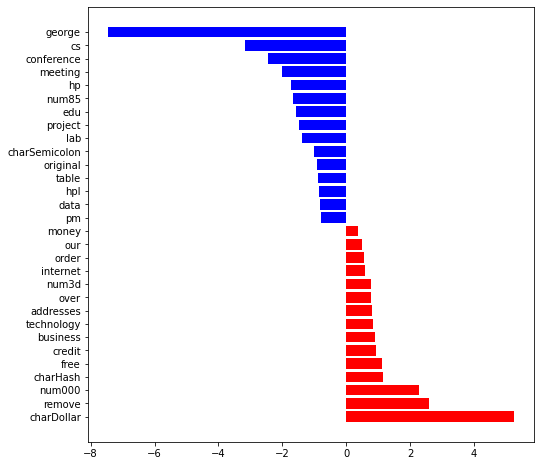

In [45]:
coef_lr = pd.DataFrame({"col":test_data.columns[:-1],
                        "coef":lr.coef_[0]})

coef_lr = coef_lr.sort_values(['coef'], ascending=False)
coef_lr2 = pd.concat([coef_lr.iloc[:15,:], coef_lr.iloc[-15:,:]])

colors = ['red']*15+['blue']*15

plt.figure(figsize=(8,8))

plt.barh(y=coef_lr2['col'], width=coef_lr2['coef'], color=colors);

In [58]:
pipe = Pipeline(steps=[("scaler", StandardScaler()), ("lr", LogisticRegression(C=1,penalty='l1', solver='liblinear'))])

param_grid = {
    "lr__C": [0.01,0.1,1,0,10,100]
}

search = GridSearchCV(pipe, param_grid, scoring="accuracy", cv=10, n_jobs=-1)
search.fit(train_data.iloc[:,:-1], train_data.iloc[:,-1])

C:\Users\tanak\anaconda3\envs\tanaka_env1\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.88599034 0.91835749 0.9294686         nan 0.92753623 0.9263285 ]
  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(C=1, penalty='l1',
                                                           solver='liblinear'))]),
             n_jobs=-1, param_grid={'lr__C': [0.01, 0.1, 1, 0, 10, 100]},
             scoring='accuracy')

In [59]:
search.best_score_

0.9294685990338163

In [61]:
pred = search.best_estimator_.predict(test_data.iloc[:,:-1])
print("confusion matrix")
print(confusion_matrix(test_data.iloc[:,-1], pred))
print("accuracy: ", accuracy_score(test_data.iloc[:,-1], pred))
print("precision: ", precision_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))
print("recall: ", recall_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))
print("F1: ", f1_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))

confusion matrix
[[261  18]
 [ 21 161]]
accuracy:  0.9154013015184381
precision:  0.8994413407821229
recall:  0.8846153846153846
F1:  0.8919667590027701


#### ベイズ判別分析
説明変数$\boldsymbol{x}$を条件、被説明変数である目的変数$\boldsymbol{y}$を結果と考えた場合、  
条件$\boldsymbol{x}$のもとで結果$\boldsymbol{y}$が起こる条件付き確率$p(\boldsymbol{y}|\boldsymbol{x})$は、ベイズの定理から次の式で表すことができる。  
$$
p(\boldsymbol{y}|\boldsymbol{x})=\frac{p(\boldsymbol{y})p(\boldsymbol{x}|\boldsymbol{y})}{p(\boldsymbol{x})}
$$
$p(\boldsymbol{y}|\boldsymbol{x})$を**事後確率**、$p(\boldsymbol{y})$を**事前確率**と呼ぶ。  
分母の$p(\boldsymbol{x})$が定数であるため、事後確率を最大にすることは、分子の$p(\boldsymbol{y})p(\boldsymbol{x}|\boldsymbol{y})$を最大にすることに等しい。   
テキスト$i$の変数ベクトルを$\boldsymbol{x}_i=(x_{i1},x_{i2},\cdots,x_{ij},\cdots,x_{ip})$、テキストが群$k$に属することを$C_k,k=1,2,\cdots,K$で示す。  
テキスト$i$が群$k$に判別される確率$p(C_k|\boldsymbol{x}_i)$は
$$
p(C_k|\boldsymbol{x}_i)=\frac{p(C_k)p(\boldsymbol{x}_i|C_k)}{p(\boldsymbol{x}_i)}
$$
この定理に基づいた判別分析を**ベイズ判別分析法**と呼ぶ。  
ベイズ判別分析では、$p(\boldsymbol{x}_i|C_k)$がもっとも大きい群に所属すると判断する。
$$
\arg\max\{p(C_1|\boldsymbol{x}_i),p(C_2|\boldsymbol{x}_i),\cdots,p(C_k|\boldsymbol{x}_i) \}
$$
$p(C_k|\boldsymbol{x}_i)$の最大化は、ベイズ定理式の右辺の分子の最大化に等しい、
$$
p(C_k)p(\boldsymbol{x}_i|C_k)=p(C_k)\prod_{j=1}^pp(\boldsymbol{x}_{ij}|C_k)
$$
この式を最大化することは、対数変換した次の式を最大化することに等しい。
$$
\arg\max\bigl\{\log{[p(C_k)]}+\sum_{j=1}^p\log{[p(x_{ij}|C_k)]} \bigr\}
$$
式の中の$p(C_k)$は、群$k$が全体に占める確率$(n_k/n)$である。  
$n_k$は群$k$のテキストの数、$n$はテキストの総数である。  
$p(x_{ij}|C_k)$は、群$k$におけるテキスト$i$の変数$j$の確率である。  
$p(x_{ij}|C_k)$がゼロの場合は対数計算ができないため、1またはパラメータを加え、平滑化する工夫が行われている。  
このようなアプローチの判別法を**ナイーブベイズ法**と呼ぶ。  
  
学習データにおける多項モデルの$p(x_{ij}|C_k)$のみを次に示す。  
式の中の$x_{C_kj}$は、群$C_k$における$j$番目の語句の出現頻度である。  
$$
p(x_{ij}|C_k)=\frac{x_{C_kj}}{\sum_{j=1}^px_{C_kj}}
$$
よって、群$C_k$における多項モデルの学習の計算式は次となる。
$$
\log\frac{n_{C_k}}{n}+\sum_{j=1}^p\log\biggl(\frac{x_{C_kj}}{\sum_{m=1}^px_{C_km}} \biggr)
$$
対数計算の汎用化のため、次のようなスムージング処理を行う。  
これを**ラプラス・スムージング**と呼ぶ。一般的には$\alpha=0.5または1$が多く用いられる。
$$
p(x_{ij}|C_k)=\frac{x_{C_kj}+\alpha}{\sum_{j=1}^p(x_{C_kj}+\alpha)}
$$

In [63]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=0.5)
clf.fit(train_data.iloc[:,:-1], train_data.iloc[:,-1])

MultinomialNB(alpha=0.5)

In [64]:
pred = clf.predict(test_data.iloc[:,:-1])
print("confusion matrix")
print(confusion_matrix(test_data.iloc[:,-1], pred))
print("accuracy: ", accuracy_score(test_data.iloc[:,-1], pred))
print("precision: ", precision_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))
print("recall: ", recall_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))
print("F1: ", f1_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))

confusion matrix
[[231  48]
 [ 55 127]]
accuracy:  0.7765726681127982
precision:  0.7257142857142858
recall:  0.6978021978021978
F1:  0.7114845938375349


#### サポートベクターマシン
**サポートベクターマシン**では、線形判別法のように１直線ではなく、一定の幅によって判別境界を設定する。  
帯(判別境界)は、中央の境界線と境界線にもっとも近い両群のデータとの距離を幅として持つ。  
この帯の幅をマージンと呼び、中央の境界線にもっとも近いデータをサポートベクターと呼ぶ。  
SVM法はこのマージンが最大になる解法を見つけることである。

In [65]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(train_data.iloc[:,:-1], train_data.iloc[:,-1])

C:\Users\tanak\anaconda3\envs\tanaka_env1\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [66]:
pred = svc.predict(test_data.iloc[:,:-1])
print("confusion matrix")
print(confusion_matrix(test_data.iloc[:,-1], pred))
print("accuracy: ", accuracy_score(test_data.iloc[:,-1], pred))
print("precision: ", precision_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))
print("recall: ", recall_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))
print("F1: ", f1_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))

confusion matrix
[[182  97]
 [ 13 169]]
accuracy:  0.7613882863340564
precision:  0.6353383458646616
recall:  0.9285714285714286
F1:  0.7544642857142858


次にカーネル法を用いたサポートベクターマシンの結果を示す。  
ガウスカーネルが用いられており、罰則コスト$C$は1になっている。

In [92]:
from sklearn.svm import SVC

ksvm = SVC(kernel='rbf', gamma=0.1)
ksvm.fit(train_data_scaled.iloc[:,:-1], train_data_scaled.iloc[:,-1])

SVC(gamma=0.1)

In [94]:
pred = ksvm.predict(test_data_scaled.iloc[:,:-1])
print("confusion matrix")
print(confusion_matrix(test_data_scaled.iloc[:,-1], pred))
print("accuracy: ", accuracy_score(test_data_scaled.iloc[:,-1], pred))
print("precision: ", precision_score(test_data_scaled.iloc[:,-1], pred, pos_label = 'spam'))
print("recall: ", recall_score(test_data_scaled.iloc[:,-1], pred, pos_label = 'spam'))
print("F1: ", f1_score(test_data_scaled.iloc[:,-1], pred, pos_label = 'spam'))

confusion matrix
[[262  17]
 [ 34 148]]
accuracy:  0.8893709327548807
precision:  0.896969696969697
recall:  0.8131868131868132
F1:  0.8530259365994236


In [95]:
pipe = Pipeline(steps=[("scaler", StandardScaler()), ("svc", SVC(kernel='rbf'))])

param_grid = {
    "svc__C": [0.01,0.1,1,0,10],
    "svc__gamma": [0.001,0.01,0.1,1]
}

search = GridSearchCV(pipe, param_grid, scoring="accuracy", cv=10, n_jobs=-1)
search.fit(train_data.iloc[:,:-1], train_data.iloc[:,-1])

C:\Users\tanak\anaconda3\envs\tanaka_env1\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.60603865 0.73719807 0.60603865 0.60603865 0.82318841 0.90869565
 0.83043478 0.62077295 0.90483092 0.93381643 0.91449275 0.79975845
        nan        nan        nan        nan 0.93091787 0.93768116
 0.91859903 0.80483092]
  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 1, 0, 10],
                         'svc__gamma': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

In [97]:
search.best_score_

0.9376811594202898

In [96]:
pred = search.best_estimator_.predict(test_data.iloc[:,:-1])
print("confusion matrix")
print(confusion_matrix(test_data.iloc[:,-1], pred))
print("accuracy: ", accuracy_score(test_data.iloc[:,-1], pred))
print("precision: ", precision_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))
print("recall: ", recall_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))
print("F1: ", f1_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))

confusion matrix
[[258  21]
 [ 19 163]]
accuracy:  0.913232104121475
precision:  0.8858695652173914
recall:  0.8956043956043956
F1:  0.8907103825136612


##### サポートベクターマシンの数理の基本
学習データの集合$(\boldsymbol{x}_1,y_1),(\boldsymbol{x}_2,y_2),\cdots,(\boldsymbol{x}_n,y_n)$があるとする。  
$\boldsymbol{x}_i=(x_{i1},x_{i2},\cdots,x_{ij},\cdots,x_{ip})$は、個体特徴ベクトル、$\boldsymbol{y}=(y_1,y_2,\cdots,y_i,\cdots,y_n)$は、目的変数である。  
線形回帰と線形判別の問題では、次に示す線形関数を用いる。  
$$
y=f(\boldsymbol{x})=\sum_{i=1}^n\beta_ix_i+\beta_0=\boldsymbol{\beta x^T}+\beta_0
$$
ここで、2群線形判別のSVMのイメージを示す。

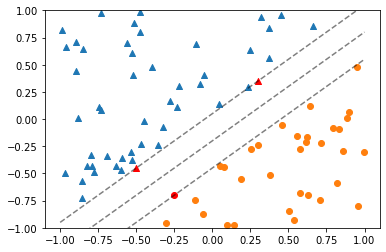

In [170]:
rnd = np.random.uniform(-1,1, (100,2))

r1 = rnd[(-4*rnd[:,0]+4*rnd[:,1])+0.8> 1]
r2 = rnd[(-4*rnd[:,0]+4*rnd[:,1])+0.8<-1]
sv1 = np.array([[-0.5, -0.45], [0.3, 0.35]])
sv2 = np.array([[-0.25, -0.7]])

plt.scatter(r1[:,0], r1[:,1], marker='^')
plt.scatter(r2[:,0], r2[:,1])
plt.scatter(sv1[:,0], sv1[:,1], color='red', marker='^')
plt.scatter(sv2[:,0], sv2[:,1], color='red')

plt.plot(np.arange(-1,2), np.arange(-1,2)+0.05, '--', color='black', alpha=0.5)
plt.plot(np.arange(-1,2), np.arange(-1,2)-0.2, '--', color='black', alpha=0.5)
plt.plot(np.arange(-1,2), np.arange(-1,2)-0.45, '--', color='black', alpha=0.5)

plt.ylim(-1,1);

$\boldsymbol{\beta x^T}+\beta_0\geq1$は上部のグループ, $\boldsymbol{\beta x^T}+\beta_0\leq-1$は下部のグループに判別される。  
$$
y= \left\{
\begin{array}{ll}
1 & (\boldsymbol{\beta x^T}+\beta_0\geq1) \\
-1 & (\boldsymbol{\beta x^T}+\beta_0\leq-1)
\end{array}
\right.
$$
破線上の個体がサポートベクターであり、マージンの幅に影響を与えるのはサポートベクターのみである。  
マージンを最大にすることは$|\boldsymbol{\beta}|$を最小にすることである。  
その解を求めるため、$y_i(\boldsymbol{\beta}\boldsymbol{x}_i^T+\beta_0)=1$のマージン両側の超平面に対し、   
ラグランジュ乗数$\boldsymbol{\alpha}=(\alpha_1,\alpha_2,\cdots,\alpha_n)$を用いたラグランジュ関数を導入する。
$$
L(\boldsymbol{\beta},\beta_0,\boldsymbol{\alpha})=\frac{1}{2}|\boldsymbol{\beta}|^2-\sum_{i=1}^n\alpha_i(y_i(\boldsymbol{\beta}\boldsymbol{x}_i^T+\beta_0)-1)
$$
この関数の最適解の推定は2つのステップを要する。
1. $\boldsymbol{\beta}\boldsymbol{x},\beta_0$を求める  
$L$についての$\boldsymbol{\beta}\boldsymbol{x},\beta_0$のの偏微分方程式
$$
\frac{\partial L}{\partial \boldsymbol{\beta}}=\boldsymbol{\beta}-\sum_{i=1}^n\alpha_iy_i\boldsymbol{x}_i=0\\
\frac{\partial L}{\partial \beta_0}=-\sum_{i=1}^n\alpha_iy_i=0
$$
を解くと次に結果が得られる。
$$
\boldsymbol{\beta}=\sum_{i=1}^n\alpha_iy_i\boldsymbol{x}_i,\ \sum_{i=1}^n\alpha_iy_i=0
$$
$\hat{\boldsymbol{\alpha}}$が得られたら$\hat{\boldsymbol{\beta}}$の推定値は次となる。
$$
\hat{\boldsymbol{\beta}}=\sum_{i=1}^n\hat{\alpha}_iy_i\boldsymbol{x}_i
$$
切片$\beta_0$は、$\hat{\boldsymbol{\beta}}\boldsymbol{x}_i^T+\beta_0=0$を挟むマージンの上側の超平面$\hat{\boldsymbol{\beta}}\boldsymbol{x}_i^T+\beta_0=1$と  
下側の超平面$\hat{\boldsymbol{\beta}}\boldsymbol{x}_i^T+\beta_0=-1$が同時に成り立つことから次のように求まる。  
$$
\hat{\beta}_0=\frac{1}{2}(\boldsymbol{\beta}\boldsymbol{x}_+^T+\boldsymbol{\beta}\boldsymbol{x}_-^T)
$$
よってマージン最大の判別関数は次となる。
$$
L(\boldsymbol{\alpha})=\sum_{i=1}^n\alpha_i-\frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jy_iy_j\boldsymbol{x}_j\boldsymbol{x}_i^T
$$
2. $L(\boldsymbol{\alpha})$を最大とする推測値$\hat{\boldsymbol{\alpha}}$を求める。  
　目的関数:$\max\{\boldsymbol{\alpha}\}=\max\bigl\{\sum_{i=1}^n\alpha_i-\frac{1} {2}\sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jy_iy_j\boldsymbol{x}_j\boldsymbol{x}_i^T \bigr\}$  
　制約条件:$\alpha_i\geq0,\ \sum_{i=1}^n\alpha_iy_i=0$  
この最適化問題はKKTの条件下での双対問題と言われている。  
KKTの条件下ではサポート点のみ$\alpha_i>0$であり、それ以外は$\alpha_i=0$である。  
未知のデータへの汎用力を高めるには多少のご班別の可能性も担保することも必要である。  
境界線周辺に小さい$\xi_i$について許容範囲を設け、$y_i(\boldsymbol{\beta}\boldsymbol{x}_i^T+\beta_0)\geq1-\xi_i,\ \boldsymbol{\xi}=(\xi_i\geq0|i=1,2,\cdots,n)$の問題を解く。  
これをソフトマージンと呼ぶ。  
　目的関数:$\min\bigl\{\frac{1}{2}|\boldsymbol{\beta}|^2+c\sum_{i=1}^n\xi_i \bigr\}$  
　制約条件:$y_i(\boldsymbol{\beta}\boldsymbol{x}_i^T+\beta_0)\geq1-\xi_i,\ \xi_i\geq0,\ i=1,2,\cdots,n$  
とする。  
問題を解くため、ラグランジュの未定乗数を導入したラグランジュ関数は次となる。
$$
L(\boldsymbol{\beta},\beta_0,\boldsymbol{\alpha},\boldsymbol{\xi})=\frac{1}{2}|\boldsymbol{\beta}|^2+C\sum_{i=1}^n\xi_i-\sum_{i=1}
^n\alpha_i[y_i(\boldsymbol{\beta}\boldsymbol{x}_i^T+\beta_0)-1+\xi_i]-\sum_{i=1}^n\xi_i\mu_i$$

制約条件の下で$L$について$\boldsymbol{\beta},\boldsymbol{\alpha},\boldsymbol{\xi}$の微分をゼロとし、その連立方程式を解くと。  
$$
\boldsymbol{\beta}=\sum_{i=1}^n\alpha_iy_i\boldsymbol{x}_i,\ \sum_{i=1}^n\alpha_iy_i=0,\ \alpha_i=C-\mu_i
$$
が得られ、&L&は次のように整理される。
$$
L(\boldsymbol{\alpha})=\sum_{i=1}^n\alpha_i-\frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jy_iy_j\boldsymbol{x}_j\boldsymbol{x}_i^T
$$
$L(\boldsymbol{\alpha})$を$0\leq\alpha_i\leq C,\ \sum_{i=1}^n\alpha_iy_i=0$等の条件の下で整理するとマージン最大化の判別式は次のように求められる。
$$
f(x)=\hat{\beta}_0+\sum_{i=1}^n\hat{\alpha}_iy_i\boldsymbol{x}_i\boldsymbol{x}^T
$$
式の中の$\boldsymbol{x}_i\boldsymbol{x}^T$はカーネルの一種であるから、一般化したカーネル$k(\boldsymbol{x}_i,\boldsymbol{x})$を導入する。
$$
f(x)=\hat{\beta}_0+\sum_{i=1}^n\hat{\alpha}_iy_ik(\boldsymbol{x}_i,\boldsymbol{x})
$$
##### カーネル
**カーネル**とは、特徴ベクトル$\boldsymbol{x}$に対し、関数$\varphi(\boldsymbol{x})$を用いた一種の射影である。  
広く用いられているカーネルとしては次のものが挙げられる。
- 内積カーネル:　$K(\boldsymbol{x}_i,\boldsymbol{x}_j)=\boldsymbol{x}_i\boldsymbol{x}_j$  
- 多項式カーネル:　$K(\boldsymbol{x}_i,\boldsymbol{x}_j)=(\boldsymbol{x}_i\boldsymbol{x}_j+c)^d$
- ガウスカーネル:　$K(\boldsymbol{x}_i,\boldsymbol{x}_j)=\exp\biggl(-\frac{|\boldsymbol{x}_i-\boldsymbol{x}_j|^2}{\sigma^2} \biggr)$  

カーネルを導入することで、非線形の問題を線形的アプローチで解決することができる。

#### ツリーモデル
**ツリーモデル**は、学習データを用いて、変数を分岐させるという方法で分類のルールを構築する。  
分類の問題で分類木、または**決定木**、回帰の問題では回帰木と呼ぶ。  
広く用いられているツリーモデルは、CHAID、C5.0、CARTをベースとした3種類のアルゴリズムである。  
**CART**は、1つのノードから2つの枝が分岐する2進木を生成し、分岐する変数を選択する際に**不純度**という指標を用いる。  
不純度とは、ノードに複数のクラスに由来するサンプルが含まれる度合をいい、複数のクラスのサンプルが混じるほど高くなる。  
不純度は、変数を分岐させる前と後の誤差の改善度合を示す指標であり、次の式で定義されている。
$$
\Delta GI(t)=P_tGI(t)-P_LGI(t_L)-P_RGI(t_R)
$$
$GI(t)$は、次に示すノード$t$におけるGini分散指標である。
$$
GI(t)=1-\sum_kp(k|t)^2
$$
式の中の$p(k|t)$は、ノード$t$内の群$k$が正しく分類されている比率である。

In [185]:
d2 = pd.read_csv('study/参考書/テキストアナリティクス/sb3.csv', encoding='shift-jis', index_col=0)
d2

,人,自分,友達,家族,車,日本,旅行,生活,学校,映画,...,必要,勉強,電話,文化,サッカー,意味,様々,料理,OTHERS,y
akke0,0.000,1.176,2.353,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,1.176,0.000,0.000,0.000,0.000,0.0,75.294,A
ataka0,0.000,1.053,0.000,0.000,0.000,0.000,0.000,3.158,0.000,0.000,...,2.105,0.000,0.000,0.000,0.000,0.000,0.000,0.0,81.053,A
kana0,0.000,0.000,0.000,0.000,0.943,0.000,0.000,0.943,0.000,0.000,...,0.943,0.000,0.000,0.000,0.000,0.000,0.000,0.0,79.245,A
kato0,2.362,0.787,0.000,0.000,0.000,11.811,0.000,1.575,0.000,0.000,...,0.000,0.000,0.000,0.787,0.000,0.787,0.000,0.0,65.354,A
kumi0,9.709,2.913,0.000,0.000,0.000,0.000,0.000,2.913,0.971,0.000,...,0.971,0.000,0.000,0.000,0.000,0.000,0.971,0.0,73.786,A
mari0,6.838,9.402,0.855,0.000,0.000,0.000,0.000,5.128,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,66.667,A
nogu0,0.787,4.724,0.000,1.575,0.000,0.000,0.000,3.150,0.787,0.000,...,0.000,0.000,0.000,0.000,0.000,0.787,0.000,0.0,74.016,A
oota0,3.571,5.357,0.000,0.000,0.000,1.786,0.000,1.786,0.893,0.000,...,0.893,0.000,0.000,0.893,1.786,0.000,0.893,0.0,66.964,A
ori0,1.802,3.604,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.901,0.000,0.0,76.577,A
taka0,3.472,0.000,0.000,0.000,0.000,0.000,0.000,0.694,0.000,0.000,...,0.000,0.000,3.472,0.000,0.000,0.000,0.000,0.0,81.944,A


In [202]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_leaf_nodes=4)
tree.fit(d2.iloc[:,:-1], d2.iloc[:,-1])

DecisionTreeClassifier(max_leaf_nodes=4)

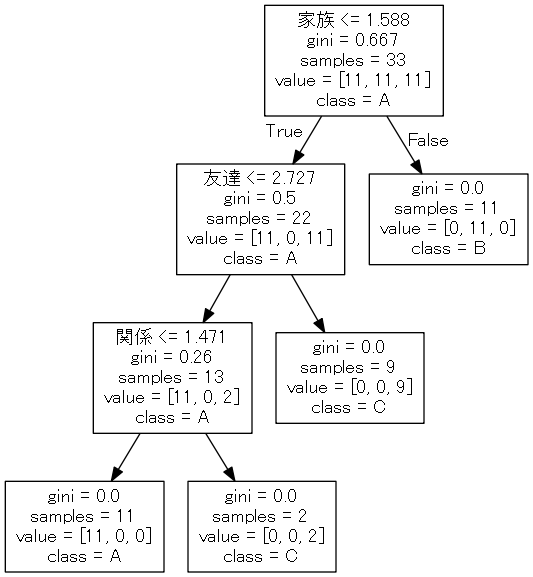

In [205]:
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,
                           out_file=None,
                           feature_names=d2.columns[:-1],
                           class_names=['A', 'B', 'C'])

graph = pydotplus.graph_from_dot_data(dot_data)

#Setting font for Node 
graph.set_fontname('MS UI Gothic')

#Setting font for Node 
for node in graph.get_nodes():
    node.set_fontname('MS UI Gothic')

#Setting font for Edges 
for e in graph.get_edges():
    e.set_fontname('MS UI Gothic')

Image(graph.create_png())

#### アンサンブル学習
**アンサンブル学習**は、決して精度が高くない複数の弱分類器の結果を統合し、精度を向上させ強分類器を作成する機械学習方法である。  
代表的なアンサンブル学習法としてはバギング、ブースティング、ランダムフォレストがある。  
##### ブースティング
**ブースティング**は、学習データにおける誤判別率を用いて、学習データ個々の重みを調整し、  
逐次的に複数の弱分類器で求めた結果を統合し、精度を向上させる。  
よく知られているのは**AdaBoost**というアルゴリズムである。  
AdaBoostのアルゴリズムの概要を示す。
1. 重みの初期値$w_{i1}=1/n\ i=1,2,\cdots,n$  
2. 次のa～dを$B$回繰り返す($b=1,2,\cdots,B$)  
　a. 重み$w_{ib}$を用いてリサンプリングを行い、データセット$D_b$を作成し、$\hat{y}=h_b(x)$を構築する  
　b. $\hat{y}=h_b(x)$の分類の誤り率$\epsilon_berr_b$を計算する。$\epsilon\leq0.5$であれば次を実行し、そうでなければaに戻る  
　c. 信頼度$\alpha_b=\frac{1}{2}\log\frac{1-\epsilon_b}{\epsilon_b}$を計算する  
　d. データの分布の重みを更新する  
　　$w_{i(b+1)}=w_{ib}\exp(-\alpha_by_ih(x_i))/z_b$、$z_b$は標準化係数である。  
3. 重み付き多数決で結果を出力する
$$
H(x)=sign\biggl\{\sum_{b=1}^B\alpha_bh_b(x) \biggr\}
$$

In [234]:
from sklearn.ensemble import AdaBoostClassifier

# base_estimator: DecisionTreeClassifier
adaboost = AdaBoostClassifier(random_state=0,
                              n_estimators=20,
                              learning_rate=0.1)

adaboost.fit(train_data.iloc[:,:-1], train_data.iloc[:,-1])

AdaBoostClassifier(learning_rate=0.1, n_estimators=20, random_state=0)

In [237]:
pred = adaboost.predict(test_data.iloc[:,:-1])
print("confusion matrix")
print(confusion_matrix(test_data.iloc[:,-1], pred))
print("accuracy: ", accuracy_score(test_data.iloc[:,-1], pred))
print("precision: ", precision_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))
print("recall: ", recall_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))
print("F1: ", f1_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))

confusion matrix
[[273   6]
 [ 40 142]]
accuracy:  0.9002169197396963
precision:  0.9594594594594594
recall:  0.7802197802197802
F1:  0.8606060606060606


##### ランダムフォレスト
**ランダムフォレスト**は、学習データから大量のサブセットを作成し、さらにサブデータセットから変数をサンプリングしツリーモデルを作成して  
多数のツリーモデルの統合結果を分類器を結果する。  
RFのアルゴリズムの概要を次に示す。データセットの中の変数の数を$M$で示す。  
1. 用いるデータセットから$B$セットのブートストラップ。サンプル$D_1,D_2,\cdots,D_B$を作成する。  
ただし、構築したモデルを評価するために役$1/3$のデータを取り除いて、残り$2/3$のデータを学習サンプルとして用いる。  
取り除いたデータをOOBと呼ぶ。
2. $D_b,b=1,2,\cdots,B$における$M$個の変数の中から$m$個の変数をランダムサンプリングし、サブデータセット$D_{bb}$を作成する。  
$m$は$M$より小さい値であり、$m=\sqrt{M}$が多用されている。  
3. ブートストラップ。サンプル$D_{bb}$の$m$個の変数を用いて未剪定の最大のツリーモデル$h_b$を生成する。  
4. $B$個のツリーモデル$h_b$について、OOBデータを用いてテストを行い、推測誤差率(OOB推定エラー率)を求める。  
その結果を統合させ新しい予測・分類器を構築する。回帰の問題では平均を、分類の問題では多数決をとる。

In [238]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1,
                            criterion="gini", # 評価指標
                            #max_features=20, # 使用する特徴量の最大数
                            #bootstrap=True, # 復元抽出の有無
                            n_estimators=300, # 決定木の数
                            class_weight="balanced", # 不均等なクラスを補正
                            n_jobs=-1)

rf.fit(train_data.iloc[:,:-1], train_data.iloc[:,-1])

RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       random_state=1)

In [239]:
pred = rf.predict(test_data.iloc[:,:-1])
print("confusion matrix")
print(confusion_matrix(test_data.iloc[:,-1], pred))
print("accuracy: ", accuracy_score(test_data.iloc[:,-1], pred))
print("precision: ", precision_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))
print("recall: ", recall_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))
print("F1: ", f1_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))

confusion matrix
[[269  10]
 [ 12 170]]
accuracy:  0.9522776572668112
precision:  0.9444444444444444
recall:  0.9340659340659341
F1:  0.9392265193370165


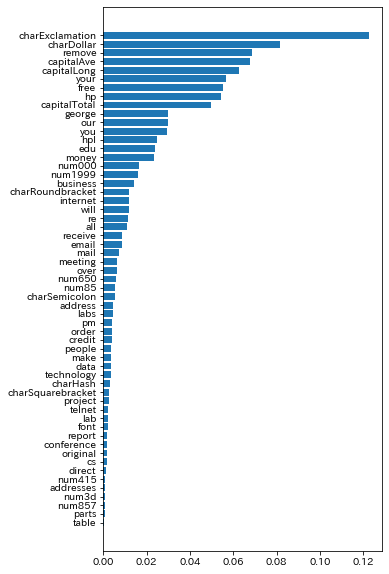

In [254]:
importance =pd.DataFrame({'feature':train_data.columns[:-1],
                          'importance':rf.feature_importances_})\
                .sort_values('importance', ascending=True).reset_index(drop=True)

plt.figure(figsize=(5,10))

plt.barh(y=importance['feature'],
         width=importance['importance']);

#### ニューラルネットワーク
**ニューラルネットワーク**は、神経細胞(ニューロン)における計算の仕組みに倣って人工的に作成した計算アルゴリズムの略称である。  
ニューロンをモデル化したものを形式ニューロンと呼ぶ。  
形式ニューロンの加算部は単純な線形結合$u=\sum_{i=1}^pw_ix_i$であり、出力部はロジスティックモデル$f(u)=1/(1+e^{-u})$のような計算を行う。 
ニューラルネットワークは、このような形式ニューロンを多数結合させ、モデルを作成する。  
分類と予測の問題では、階層的ニューラルネットワークが多用されている。  
階層的ニューラルネットワークは入力層、中間層、出力層からなり、中間層を隠れ層とも呼ぶ。  
入力層から中間層のニューロン$j$の計算は$\alpha_j=\sum_{i=1}^pw_{ij}^{(1)}x_i+w_{0j}^{(1)}$になり、  
中間層から出力層のニューロン$k$の計算は$\sum_{j=1}^hw_{jk}^{(2)}f(\alpha_j)+w_{0k}^{(2)}$となる。  
重みの$\boldsymbol{w}$は、学習データにおける$y$と予測の結果$\hat{y}$の差、つまり損失関数が最小となるよう繰り返し調整する。

In [262]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(40,20,), max_iter=100)
mlp.fit(train_data.iloc[:,:-1], train_data.iloc[:,-1])

MLPClassifier(hidden_layer_sizes=(40, 20), max_iter=100)

In [263]:
pred = mlp.predict(test_data.iloc[:,:-1])
print("confusion matrix")
print(confusion_matrix(test_data.iloc[:,-1], pred))
print("accuracy: ", accuracy_score(test_data.iloc[:,-1], pred))
print("precision: ", precision_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))
print("recall: ", recall_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))
print("F1: ", f1_score(test_data.iloc[:,-1], pred, pos_label = 'spam'))

confusion matrix
[[245  34]
 [ 10 172]]
accuracy:  0.9045553145336226
precision:  0.8349514563106796
recall:  0.945054945054945
F1:  0.88659793814433


#### 統合的分析
データにより分類器の正解率が異なる場合がある。  
また、研究対象からは異なる側面からデータセットを作成することができる。  
どのデータセットにどの分類器を用いて分析を行うかが問題となる。  
これに対し、強分類器のアンサンブル学習による**統合的分析**の方法が提案されている。  
統合的分析では、研究対象から$m$種類のデータセットを抽出し、$k$種類の分類器を用いて学習とテストを行った結果について、  
アンサンブル学習法で結論を出すものである。  
分類モデルでは、重み付き多数決をとる。